# uADA Price Visualization

This notebook visualizes the price data of uADA token from the past hour. We'll create multiple interactive visualizations directly in the notebook:

1. Basic line charts for both `ua_token_amount` and `odos_usdc_return`
2. Enhanced line charts with trend lines and min/max annotations
3. Scatter plot showing the relationship between token amount and USDC return
4. Statistical analysis of the data

All charts will display directly in the notebook cells when run.

In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Set figure aesthetics for better visualization
plt.style.use('ggplot')

# This ensures all plots display directly in the notebook
%matplotlib inline

# Set higher DPI for sharper in-notebook display
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load the CSV data
df = pd.read_csv('uADA_price_1hrs.csv')

# Display the first few rows to verify data loading
print(f"Total rows: {len(df)}")
df.head()

Total rows: 1191


,id,token_symbol,timestamp,ua_token_amount,odos_usdc_return,profit_amount,profit_percentage,input_usdc_amount
0,2490053,uADA,2025-03-17 05:44:36.279826+00,1395583400000000000000,987.619230,-12.380770,-1.238077,1000.0
1,2490062,uADA,2025-03-17 05:44:56.148222+00,1395889000000000000000,987.743072,-12.256928,-1.225693,1000.0
2,2490070,uADA,2025-03-17 05:45:16.105533+00,1395968900000000000000,987.810352,-12.189648,-1.218965,1000.0
3,2490079,uADA,2025-03-17 05:45:36.238301+00,1396366800000000000000,988.067920,-11.932080,-1.193208,1000.0
4,2490090,uADA,2025-03-17 05:45:56.191159+00,1396361800000000000000,987.778073,-12.221927,-1.222193,1000.0


In [3]:
# Data preprocessing
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert ua_token_amount from string to float (it's in wei format with 18 decimals)
df['ua_token_amount'] = df['ua_token_amount'].astype(float)

# Convert to a more readable format (divide by 10^18 to get the actual token amount)
df['ua_token_amount_readable'] = df['ua_token_amount'] / 1e18

# Sort by timestamp to ensure proper chronological order
df = df.sort_values('timestamp')

# Check data types after conversion
df.dtypes

id                                        int64
token_symbol                             object
timestamp                   datetime64[ns, UTC]
ua_token_amount                         float64
odos_usdc_return                        float64
profit_amount                           float64
profit_percentage                       float64
input_usdc_amount                       float64
ua_token_amount_readable                float64
dtype: object

## Basic Line Charts

Let's create two separate line charts for the token amount and USDC return.

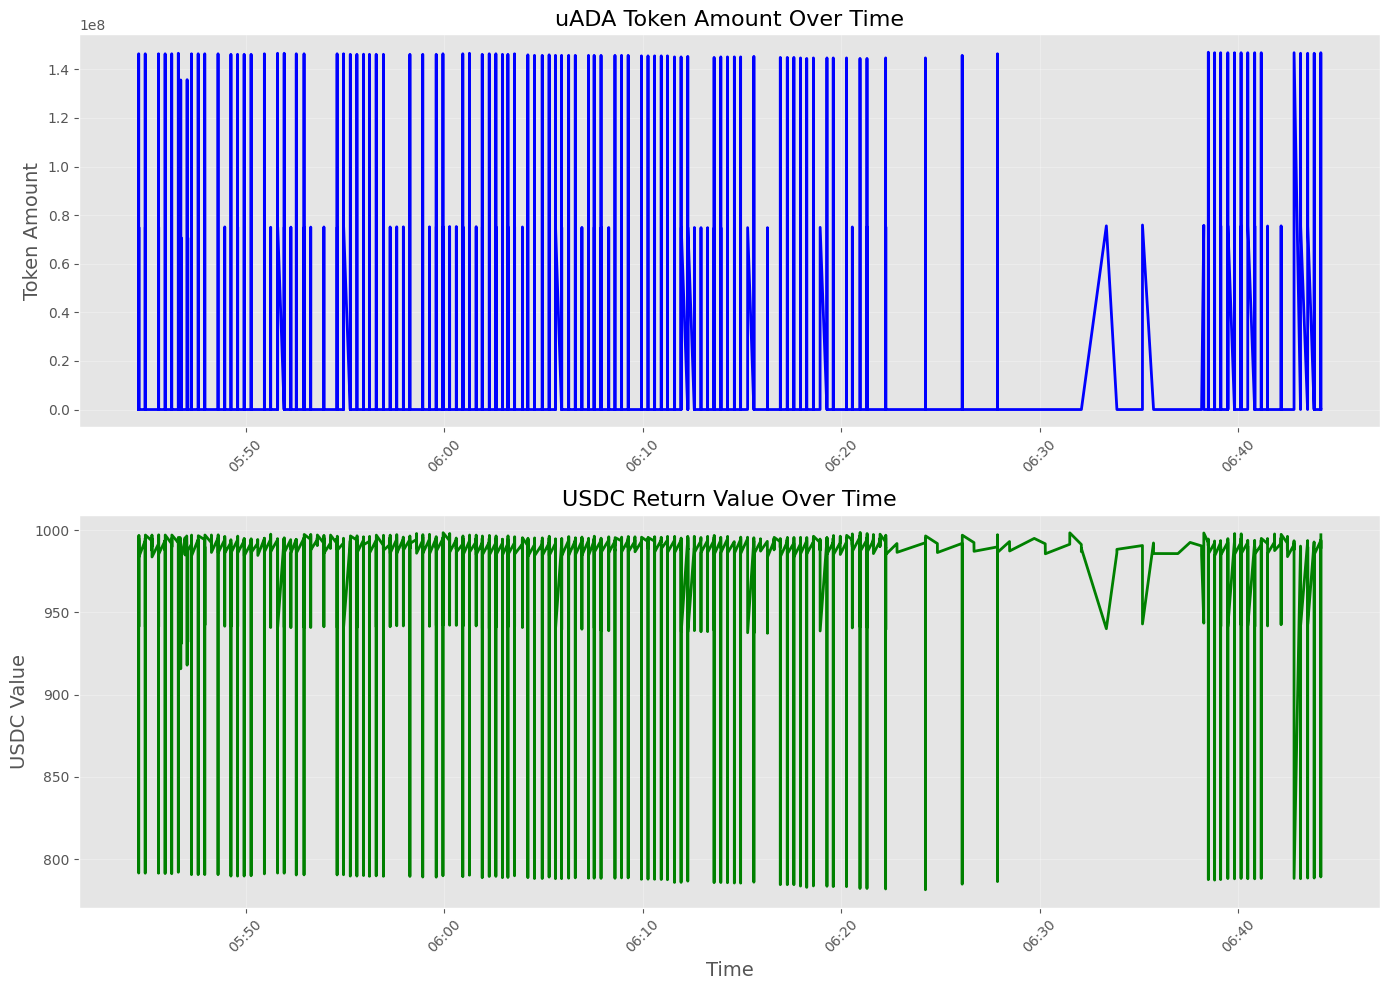

In [4]:
# Set up the figure with two subplots (one for each metric)
plt.figure(figsize=(14, 10))

# Plot 1: ua_token_amount over time
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['ua_token_amount_readable'], color='blue', linewidth=2)
plt.title('uADA Token Amount Over Time', fontsize=16)
plt.ylabel('Token Amount', fontsize=14)
plt.grid(True, alpha=0.3)

# Format the x-axis to show nice time labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

# Plot 2: odos_usdc_return over time
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['odos_usdc_return'], color='green', linewidth=2)
plt.title('USDC Return Value Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('USDC Value', fontsize=14)
plt.grid(True, alpha=0.3)

# Format the x-axis to show nice time labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
# Display in notebook
plt.show()
# Optional: save as image file
plt.savefig('uada_price_charts.png', dpi=300)

## Enhanced Visualization with Trend Lines

Now let's create more detailed visualizations with trend lines and annotations.

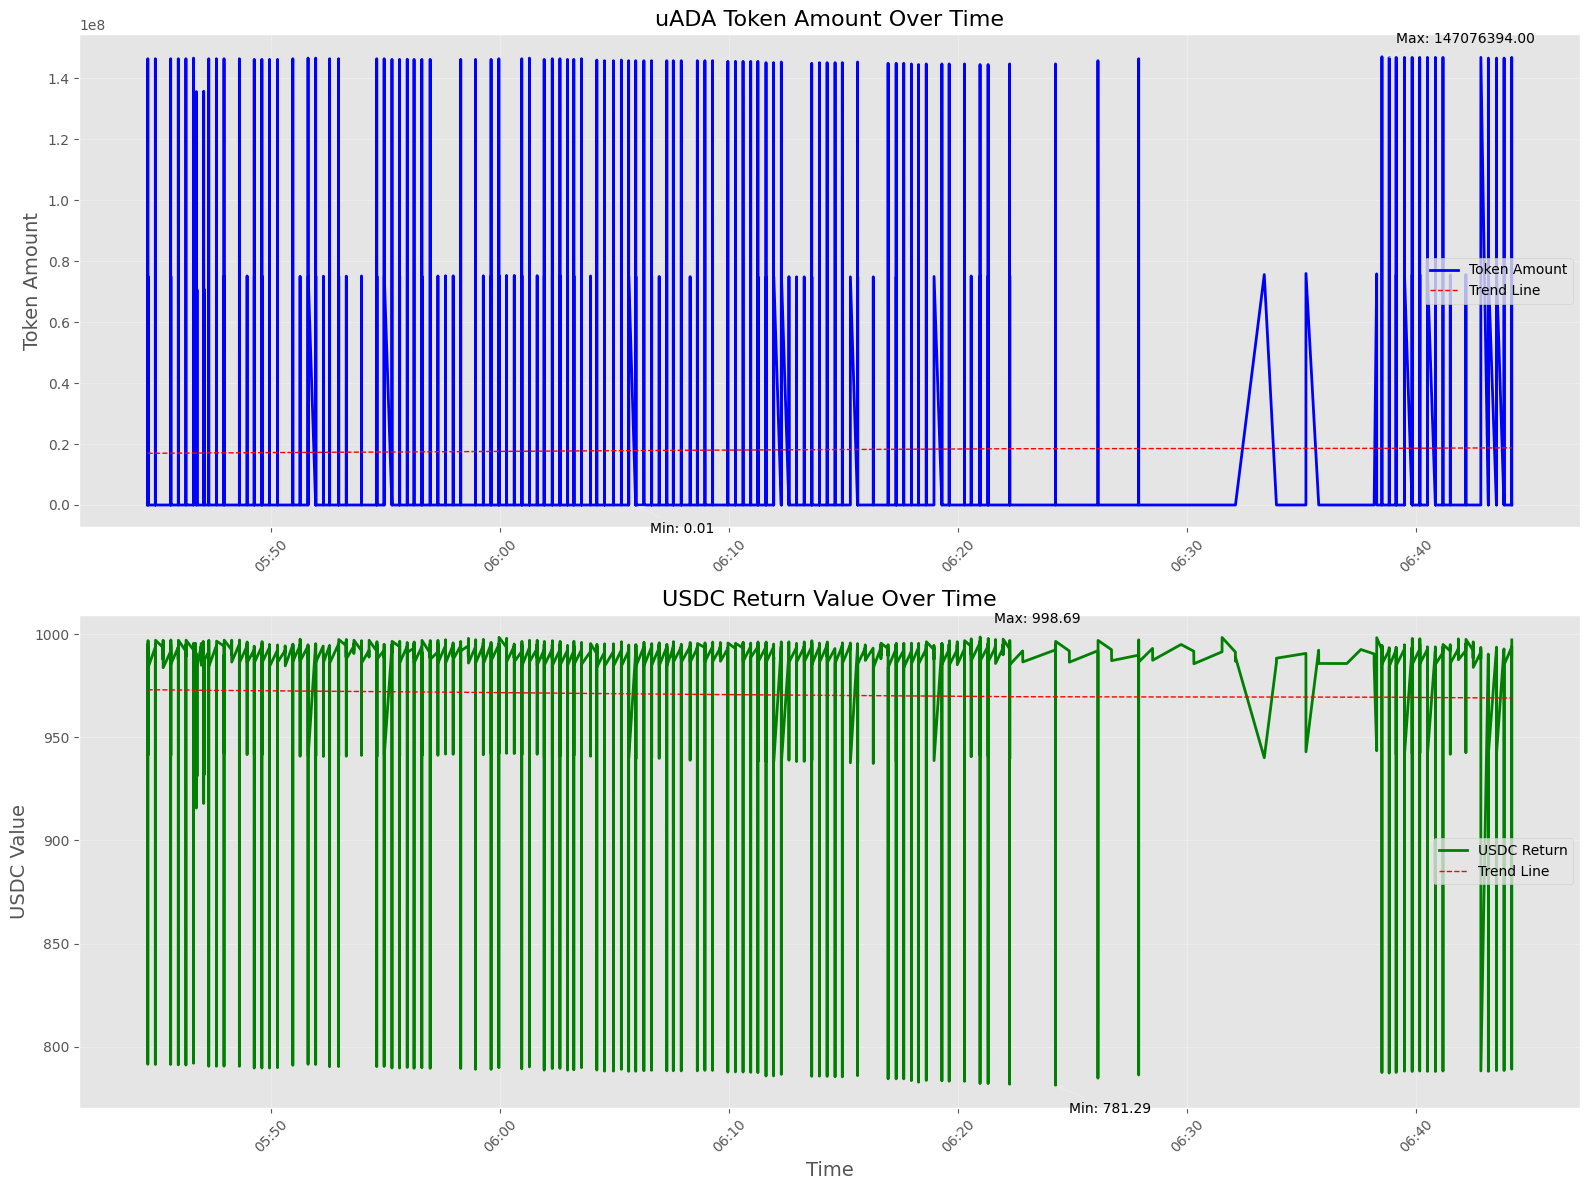

In [5]:
# Enhanced visualization with additional insights
plt.figure(figsize=(16, 12))

# Plot with more detailed formatting
# 1. ua_token_amount with trend line
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['ua_token_amount_readable'], color='blue', linewidth=2, label='Token Amount')

# Add trend line
z = np.polyfit(range(len(df)), df['ua_token_amount_readable'], 1)
p = np.poly1d(z)
plt.plot(df['timestamp'], p(range(len(df))), "r--", linewidth=1, label='Trend Line')

plt.title('uADA Token Amount Over Time', fontsize=16)
plt.ylabel('Token Amount', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations for min and max values
max_token_idx = df['ua_token_amount_readable'].idxmax()
min_token_idx = df['ua_token_amount_readable'].idxmin()

plt.annotate(f'Max: {df.loc[max_token_idx, "ua_token_amount_readable"]:.2f}',
             xy=(df.loc[max_token_idx, 'timestamp'], df.loc[max_token_idx, 'ua_token_amount_readable']),
             xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Min: {df.loc[min_token_idx, "ua_token_amount_readable"]:.2f}',
             xy=(df.loc[min_token_idx, 'timestamp'], df.loc[min_token_idx, 'ua_token_amount_readable']),
             xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

# 2. odos_usdc_return with trend line
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['odos_usdc_return'], color='green', linewidth=2, label='USDC Return')

# Add trend line
z = np.polyfit(range(len(df)), df['odos_usdc_return'], 1)
p = np.poly1d(z)
plt.plot(df['timestamp'], p(range(len(df))), "r--", linewidth=1, label='Trend Line')

plt.title('USDC Return Value Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('USDC Value', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations for min and max values
max_usdc_idx = df['odos_usdc_return'].idxmax()
min_usdc_idx = df['odos_usdc_return'].idxmin()

plt.annotate(f'Max: {df.loc[max_usdc_idx, "odos_usdc_return"]:.2f}',
             xy=(df.loc[max_usdc_idx, 'timestamp'], df.loc[max_usdc_idx, 'odos_usdc_return']),
             xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Min: {df.loc[min_usdc_idx, "odos_usdc_return"]:.2f}',
             xy=(df.loc[min_usdc_idx, 'timestamp'], df.loc[min_usdc_idx, 'odos_usdc_return']),
             xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

plt.tight_layout()
# Display in notebook
plt.show()
# Optional: save as image file
# plt.savefig('uada_price_charts_with_trend.png', dpi=300)

## Correlation Analysis

Let's analyze the relationship between token amount and USDC return. We'll create a scatter plot to visualize their relationship and calculate the correlation coefficient.

In [6]:
# Correlation analysis
correlation = df['ua_token_amount_readable'].corr(df['odos_usdc_return'])
print(f"Correlation between token amount and USDC return: {correlation:.4f}")

# Display basic statistics
print("\nStatistics for uADA Token Amount:")
display(df['ua_token_amount_readable'].describe())

print("\nStatistics for USDC Return:")
display(df['odos_usdc_return'].describe())

Correlation between token amount and USDC return: -0.9678

Statistics for uADA Token Amount:


count    1.191000e+03
mean     1.785484e+07
std      4.325511e+07
min      1.195757e-02
25%      1.861130e+02
50%      4.371000e+02
75%      5.080100e+03
max      1.470764e+08
Name: ua_token_amount_readable, dtype: float64


Statistics for USDC Return:


count    1191.000000
mean      971.092659
std        56.131858
min       781.289655
25%       987.301810
50%       990.918718
75%       993.980014
max       998.692960
Name: odos_usdc_return, dtype: float64

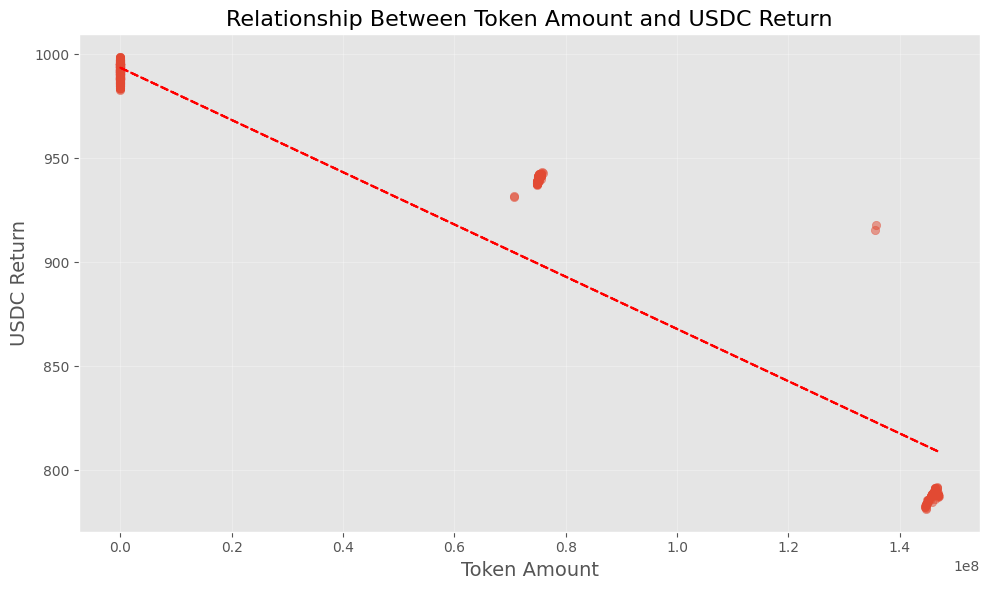

In [7]:
# Plot the relationship between token amount and USDC return
plt.figure(figsize=(10, 6))
plt.scatter(df['ua_token_amount_readable'], df['odos_usdc_return'], alpha=0.5)
plt.title('Relationship Between Token Amount and USDC Return', fontsize=16)
plt.xlabel('Token Amount', fontsize=14)
plt.ylabel('USDC Return', fontsize=14)
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['ua_token_amount_readable'], df['odos_usdc_return'], 1)
p = np.poly1d(z)
plt.plot(df['ua_token_amount_readable'], p(df['ua_token_amount_readable']), "r--")

plt.tight_layout()
# Display in notebook
plt.show()
# Optional: save as image file
plt.savefig('uada_relationship_chart.png', dpi=300)